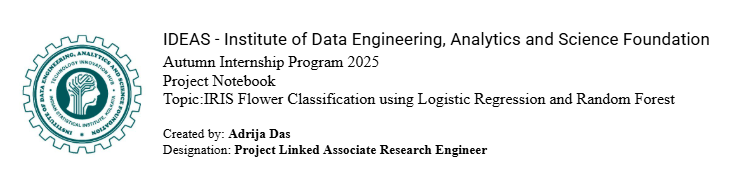

 Intern Name - Samman Das,

 Section - I

 Autumn Internship Program 2025


The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.It is one of the most famous datasets in machine learning. It contains measurements of 150 iris flowers from three different species:

1.Iris Setosa

2.Iris Versicolor

3.Iris Virginica


For each flower, we have 4 numerical features:

1.Sepal length (cm)

2.Sepal width (cm)

3.Petal length (cm)

4.Petal width (cm)

The goal is to build a classification model that can predict the species of an iris flower based on its features.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Loading and Visualization

In [2]:
# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Map numeric labels to species names
species_map = dict(zip(range(3), iris.target_names))
y = y.map(species_map)

# Combine for quick view
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Dataset info
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


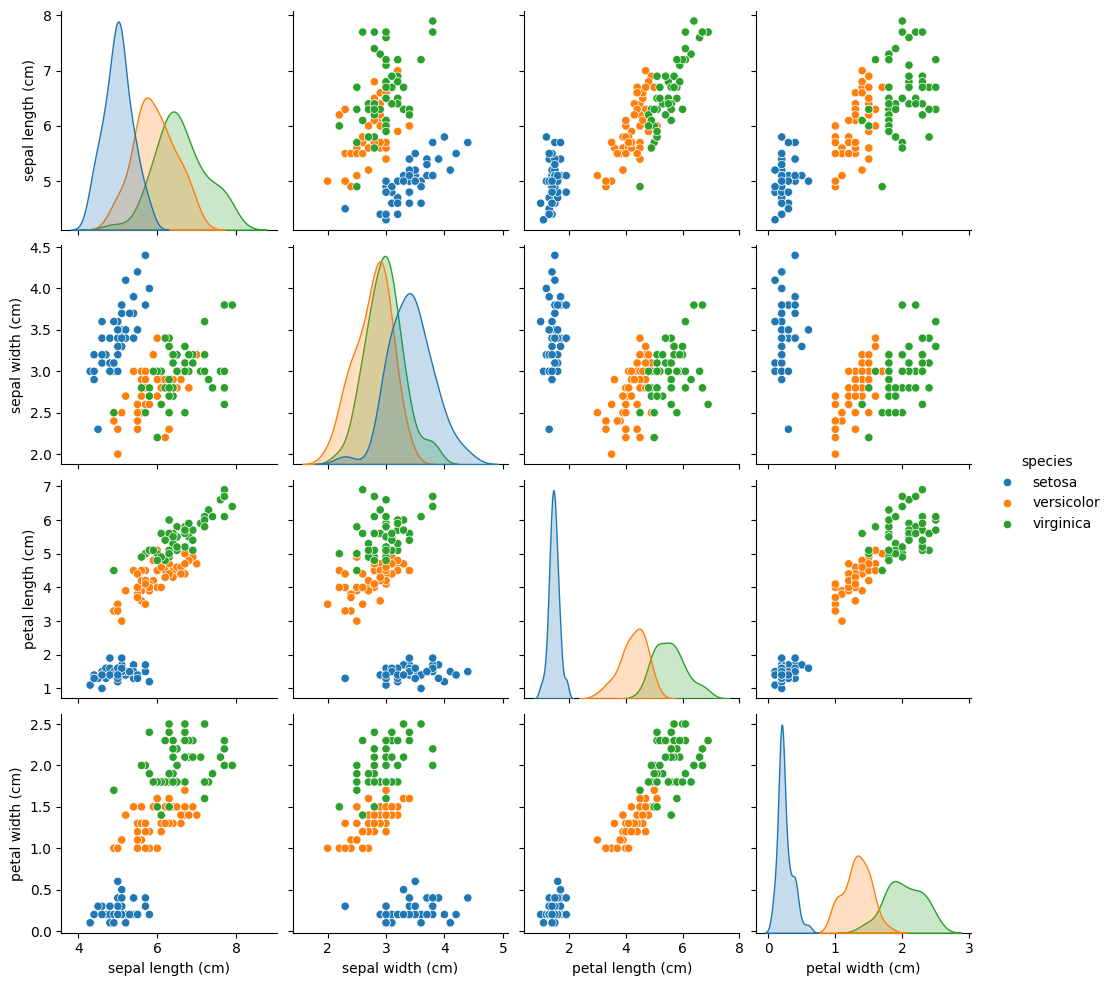

In [4]:
# Pairplot visualization
sns.pairplot(df, hue="species")
plt.show()

**Question 1**

 From the scatterplot/pairplot above which two features seem most useful for separating species?

**Answer**

From the above pair plots, we can observe from the density plot of petal length (cm) vs petal length (cm) that the setosa species is completely isolated from the other two and there is very small overlap between versicolor and virginica. the density plot of petal length (cm) vs petal width (cm) is same too. But when separating species petal length (cm) vs petal width (cm) density plot is best because we are considering a second dimension for separation. The few versicolor and virginica flowers that might have a similar petal length tend to have a different petal width, which will allow a model to draw a clean line between them. The combination of petal length and petal width is the best pair of features because they work together to separate all three classes almost perfectly.

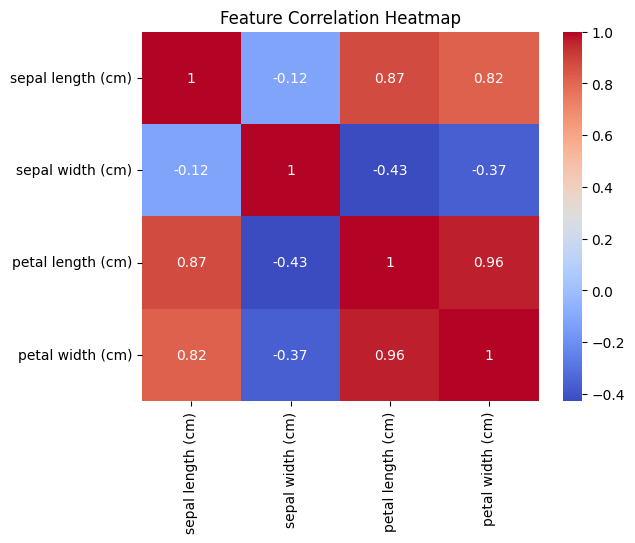

In [5]:
#Heat Map Visualisation
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


**Question 2**

Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

**Answer**

From this correlation heatmap, petal length (cm) and petal width (cm) are most correlated features here with a value of 0.96.

This implies a strong linear relationship between these two variables. It means that as the petal length of a flower increases, its petal width tends to increase as well, and vice-versa. They essentially measure very similar properties of the flower's petal.

# Train/Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 105
Test samples: 45


 **Question 3**.

  Why do we split the dataset into training and testing sets?

**Answer**

We split a dataset into training and testing sets to evaluate a machine learning model's performance on unseen data. The process helps us to ensure that the model can make accurate predictions on new, real-world data, not just the data it was trained on.

# Logistic Regression
Logistic regression is a classification model that uses input variables to predict a categorical outcome variable that can take on one of a limited set of class values. A binomial logistic regression is limited to two binary output categories while a multinomial logistic regression allows for more than two classes. Examples of logistic regression include classifying a binary condition as “healthy” / “not healthy”, or an image as “bicycle” / “train” / “car” / “truck”. Logistic regression applies the logistic sigmoid function to weighted input values to generate a prediction of the data class.

Accuracy (Logistic Regression): 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



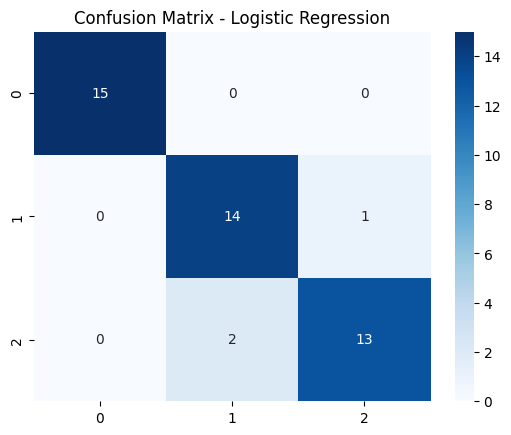

In [7]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Question 4.**

 Logistic Regression assumes a linear decision boundary. why?

**Answer**

Logistic regression employs a linear decision boundary because at the heart of it is a basic linear equation, similar to linear regression.

It begins with a linear equation in order to balance the input features. This equation creates a straight line or a flat plane.

The output is then run through a sigmoid (logistic) function, which "squashes" the output to a probability ranging from 0 to 1.

The boundary is chosen where this probability is 50% (0.5), which is precisely where the first linear equation is zero.

Since the boundary is chosen based on that linear equation, the boundary is always linear.



**Question 5.**

Do you think this assumption holds for the Iris dataset? Why or why not?

**Answer**

Yes, for the most part, the assumption of a linear decision boundary holds very well for the Iris dataset.

1. If we look at the scatterplots, especially the petal length vs. petal width, the setosa species (blue dots) is completely isolated from the other two. We can easily draw a single straight line that perfectly separates setosa from both versicolor and virginica without making any mistakes. This is the definition of perfect linear separability.

2. While versicolor (orange) and virginica (green) are much closer and have a small area of overlap, they are still largely separable by a straight line.

3. The slight overlap is exactly what we see in your model's results. The confusion matrix shows that the only errors the model made were in confusing versicolor and virginica. It had no trouble with setosa because it's so clearly separated. The model's high accuracy (~93%) shows us that a linear boundary is a very effective.

# Random Forest
Random forest is a popular ensemble learning method for classification.Ensemble learning methods combine multiple machine learning (ML) algorithms to obtain a better model—the wisdom of crowds applied to data science. They’re based on the concept that a group of people with limited knowledge about a problem domain can collectively arrive at a better solution than a single person with greater knowledge.

Random forest is an ensemble of decision trees, a problem-solving metaphor that’s familiar to nearly everyone. Decision trees arrive at an answer by asking a series of true/false questions about elements in a data set. In the example below, to predict a person's income, a decision looks at variables (features) such as whether the person has a job (yes or no) and whether the person owns a house. In an algorithmic context, the machine continually searches for which feature allows the observations in a set to be split in such a way that the resulting groups are as different from each other as possible and the members of each distinct subgroup are as similar to each other as possible.

Each tree in a random forest randomly samples subsets of the training data in a process known as bootstrap aggregating (bagging). The model is fit to these smaller data sets and the predictions are aggregated. Several instances of the same data can be used repeatedly through replacement sampling, and the result is that trees that are not only trained on different sets of data, but also different features used to make decisions.



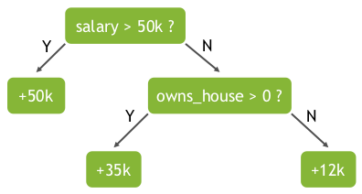
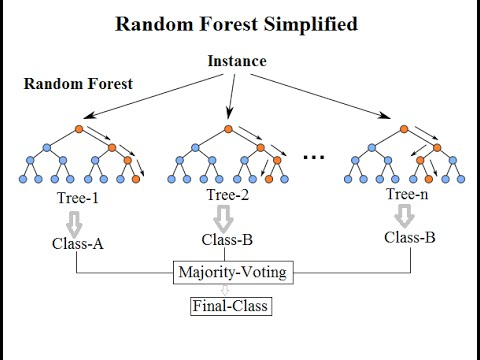

Accuracy (Random Forest): 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



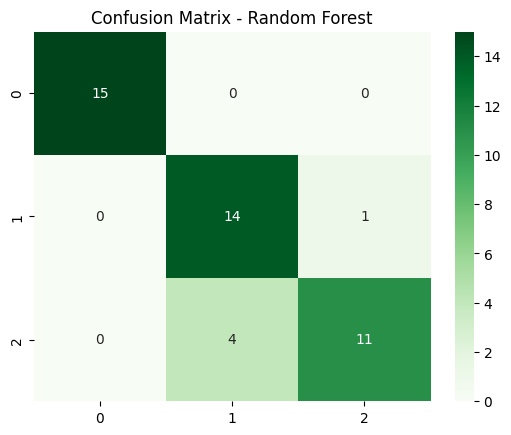

In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

**Question 6**.

 If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

**Answer**

Increasing the number of trees (n_estimators) in a Random Forest generally improves its performance and makes it more stable, but it will create diminishing returns and it will take longer training times.

With more trees, the model becomes less dependent on the specific instances of any single tree. Errors and biases from individual trees will get averaged out, which will lead to a more accurate and reliable overall prediction.

The model's predictions become more consistent and less sensitive to noise in the training data.


Accuracy (Random Forest with 500 trees): 0.9111111111111111

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



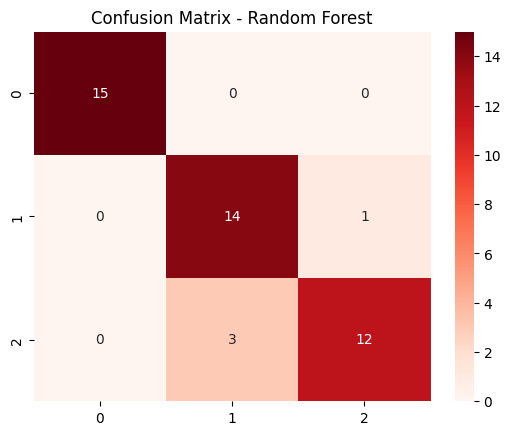

In [9]:
#Changing the n_estimators value from 100 to 500 around 5 times of the default code which is given to me.
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest with 500 trees):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Random Forest")
plt.show()

There are few improvements happened when we increased the value of number of trees

1. Overall Accuracy: Our model's accuracy increased from ~89% to ~91%.

2. Fewer Errors: The total number of misclassified flowers dropped from 5 to 4.

3. Specifically: The improvement came from correctly classifying one additional virginica flower. The model previously misclassified 4 of them, and now it only misclassifies 3.

So in conclusion we can say that increase in number of trees will result in much better performance of our model.

**Question 7**.

Between Logistic Regression and Random Forest, which model performed better? Why might that be?

**Answer**

Based on our results, the Logistic Regression model performed better.

It achieved a higher accuracy of ~93% with only 3 errors, while the best Random Forest model had an accuracy of ~91% with 4 errors when the tree count(n_estimators) is 500.

The reasons which might caused the Linear Model to perform better is -

1. **The Dataset is Linearly Separable** -
As we discussed, the Iris dataset is almost perfectly separable by straight lines. Logistic Regression is designed specifically to find the best possible linear boundaries. It's simply the right tool for this specific job.

2. **Simplicity** -
Random Forest is more complex. It creates intricate, non-linear decision boundaries by combining many trees. On a small and "clean" dataset like Iris, this extra power is unnecessary and doesn't provide an advantage. The simple, elegant solution found by Logistic Regression was more effective. On a more complex dataset with overlapping and non-linear patterns, the Random Forest would almost certainly have performed better.

**Question 8**.

If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

**Answer**

If we had a much larger dataset with noisy features, I guess the Random Forest model would have performed better.

Because in larger dataset it can easily capture the non linear boundaries and interactions automatically.

With more data, the forest “averages out” noise effectively and generalizes better.

Also the much more data will reduce variance without overfitting

---

**Question 9.**

Run the Entire Notebook with this dataset separately http://archive.ics.uci.edu/dataset/174/parkinsons. Also Answer the above questions for this dataset too.

#Parkinsons Disease Detection using Logistic Resgression and Random Forest

**Oxford Parkinson's Disease Detection Dataset**

Source:

The dataset was created by Max Little of the University of Oxford, in
collaboration with the National Centre for Voice and Speech, Denver,
Colorado, who recorded the speech signals. The original study published the
feature extraction methods for general voice disorders.


Matrix column entries (attributes):

1. name - ASCII subject name and recording number
2. MDVP:Fo(Hz) - Average vocal fundamental frequency
3. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
4. MDVP:Flo(Hz) - Minimum vocal fundamental frequency
5. MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency
6. MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
7. NHR,HNR - Two measures of ratio of noise to tonal components in the voice
8. status - Health status of the subject (one) - Parkinson's, (zero) - healthy
9. RPDE,D2 - Two nonlinear dynamical complexity measures
10. DFA - Signal fractal scaling exponent
11. spread1, spread2, PPE - Three nonlinear measures of fundamental frequency variation

Dataset citation:

> "Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection."
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM.
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)


# Data Visualization

In [10]:
!pip install ucimlrepo


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Importing required libraries, however libraries are already imported in the notebook for the first case
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
parkinsons = fetch_ucirepo(id=174)

# data (as pandas dataframes)
X_park = parkinsons.data.features
y_park = parkinsons.data.targets
X_park = X_park.loc[:, ~X_park.columns.duplicated()]
parkinsons = pd.concat([X_park, y_park], axis=1)
parkinsons.head()

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00370,0.00554,0.01109,0.04374,0.02182,0.03130,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00465,0.00696,0.01394,0.06134,0.03134,0.04518,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00544,0.00781,0.01633,0.05233,0.02757,0.03858,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00502,0.00698,0.01505,0.05492,0.02924,0.04005,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00655,0.00908,0.01966,0.06425,0.03490,0.04825,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [13]:
parkinsons.describe()

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.003306,0.003446,0.009920,0.029709,0.015664,0.017878,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.002968,0.002759,0.008903,0.018857,0.010153,0.012024,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000680,0.000920,0.002040,0.009540,0.004550,0.005700,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.001660,0.001860,0.004985,0.016505,0.008245,0.009580,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.002500,0.002690,0.007490,0.022970,0.012790,0.013470,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.003835,0.003955,0.011505,0.037885,0.020265,0.022380,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.021440,0.019580,0.064330,0.119080,0.056470,0.079400,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


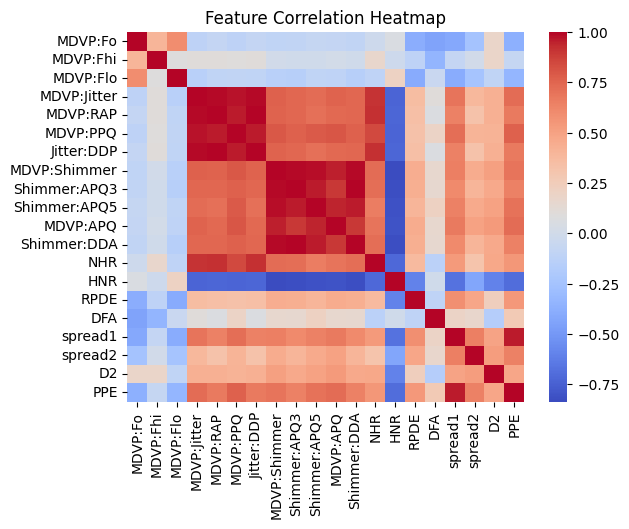

<Figure size 3000x4000 with 0 Axes>

In [14]:
sns.heatmap(parkinsons.drop("status", axis=1).corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.figure(figsize=(30,40))
plt.show()


**Question 2 [Parkinsons Dataset]**

Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

**Answer**

The correlation heatmap reveals that jitter and shimmer features form a strongly correlated cluster, all capturing aspects of vocal instability. HNR shows negative correlation with these features, which is physiologically consistent (more irregular voices have less harmonic energy). Spread and PPE features provide complementary information. This multicollinearity suggests Logistic Regression may struggle, while Random Forest can better utilize these redundant yet informative features.

# Train/Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_park, y_park, test_size=0.3, random_state=42, stratify=y_park )
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 136
Test samples: 59


 **Question 3 [Parkinsons Disease Dataset]**

  Why do we split the dataset into training and testing sets?

**Answer**

We split a dataset into training and testing sets to evaluate a machine learning model's performance on unseen data. The process helps us to ensure that the model can make accurate predictions on new, real-world data, not just the data it was trained on.

# Logistic Regression
Logistic regression is a classification model that uses input variables to predict a categorical outcome variable that can take on one of a limited set of class values. A binomial logistic regression is limited to two binary output categories while a multinomial logistic regression allows for more than two classes. Examples of logistic regression include classifying a binary condition as “healthy” / “not healthy”, or an image as “bicycle” / “train” / “car” / “truck”. Logistic regression applies the logistic sigmoid function to weighted input values to generate a prediction of the data class.

Accuracy (Logistic Regression): 0.8305084745762712

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.89      0.89      0.89        44

    accuracy                           0.83        59
   macro avg       0.78      0.78      0.78        59
weighted avg       0.83      0.83      0.83        59



c:\Users\samma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


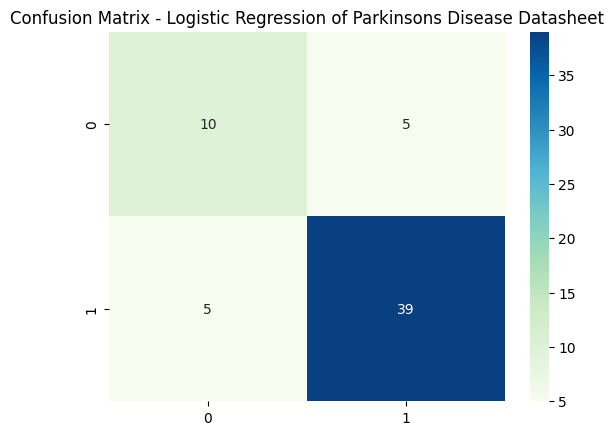

In [16]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='GnBu')
plt.title("Confusion Matrix - Logistic Regression of Parkinsons Disease Datasheet")
plt.show()

**Question 4 [Parkinsons Disease Datasheet]**

 Logistic Regression assumes a linear decision boundary. why?

**Answer**

Logistic Regression assumes a linear decision boundary because it models the target using a linear combination of features passed through a sigmoid.
The boundary between “healthy” (0) and “Parkinson’s” (1) is defined by a hyperplane (straight line in 2D, flat plane in higher dimensions).
That’s why the model works well if the data is linearly separable, but may miss complex, non-linear patterns that models like Random Forest can capture.

**Question 5 [Parkinsons Disease Datasheet]**

Do you think this assumption holds for the Iris dataset? Why or why not?

**Answer**

No, The linear boundary assumption doesn’t fully hold for the Parkinson’s dataset

1. The features are voice signal measures (frequency, jitter, shimmer, etc.).
These physiological signals don’t have a simple linear relationship with the disease.
That means the boundary between healthy and Parkinson’s patients is unlikely to be a perfect straight line.

2. Logistic Regression got ~83% accuracy. It shows that the linear separation captures a lot of signal.
But recall for class 0 (healthy) was only 0.67, which shows that the model struggles to find a clean linear split there.

3. The linear assumption partly holds: many features are informative enough that a linear model works decently.
But the dataset is not fully linearly separable as there are complex, non-linear patterns exists in the whole Dataset

# Random Forest
Random forest is a popular ensemble learning method for classification.Ensemble learning methods combine multiple machine learning (ML) algorithms to obtain a better model—the wisdom of crowds applied to data science. They’re based on the concept that a group of people with limited knowledge about a problem domain can collectively arrive at a better solution than a single person with greater knowledge.

Random forest is an ensemble of decision trees, a problem-solving metaphor that’s familiar to nearly everyone. Decision trees arrive at an answer by asking a series of true/false questions about elements in a data set. In the example below, to predict a person's income, a decision looks at variables (features) such as whether the person has a job (yes or no) and whether the person owns a house. In an algorithmic context, the machine continually searches for which feature allows the observations in a set to be split in such a way that the resulting groups are as different from each other as possible and the members of each distinct subgroup are as similar to each other as possible.

Each tree in a random forest randomly samples subsets of the training data in a process known as bootstrap aggregating (bagging). The model is fit to these smaller data sets and the predictions are aggregated. Several instances of the same data can be used repeatedly through replacement sampling, and the result is that trees that are not only trained on different sets of data, but also different features used to make decisions.

c:\Users\samma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy (Random Forest): 0.9322033898305084

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



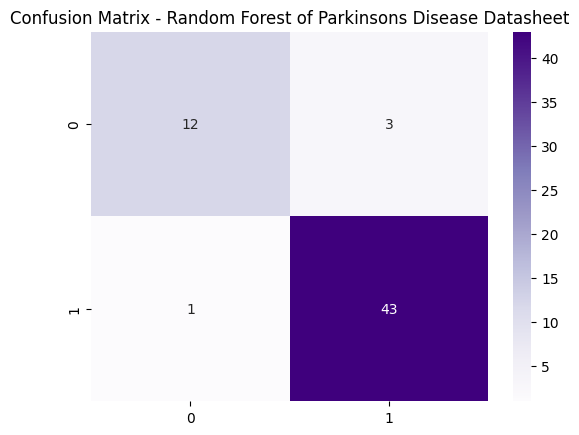

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Random Forest of Parkinsons Disease Datasheet")
plt.show()

**Question 6 [Parkinsons Disease Datasheet]**.

 If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

**Answer**

Increasing the number of trees (n_estimators) in a Random Forest generally improves its performance and makes it more stable, but it will create diminishing returns and it will take longer training times.

With more trees, the model becomes less dependent on the specific instances of any single tree. Errors and biases from individual trees will get averaged out, which will lead to a more accurate and reliable overall prediction.

The model's predictions become more consistent and less sensitive to noise in the training data.

c:\Users\samma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy (Random Forest with 500 trees): 0.9322033898305084

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



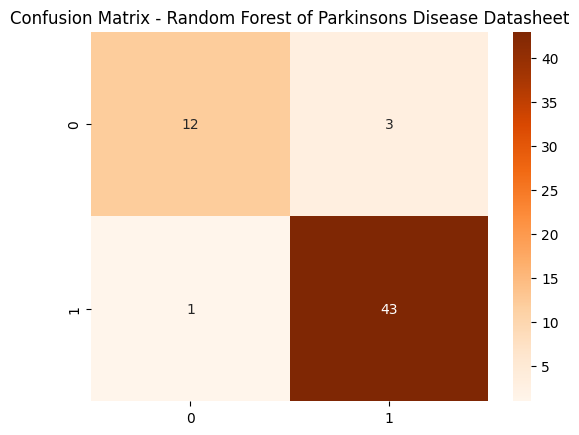

In [18]:
#Changing the n_estimators value from 100 to 500 around 5 times of the default code which is given to me.
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest with 500 trees):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Random Forest of Parkinsons Disease Datasheet")
plt.show()

 Here in this datasheet increasing n_estimators from 100 to 500 did not significantly changed the performance. This indicates that the model had already converged with fewer trees. More trees only add computation time, not accuracy gains.


**Question 7 [Parkinsons Disease Datasheet]**.

Between Logistic Regression and Random Forest, which model performed better? Why might that be?

**Answer**

From the observation we found that Random Forest [~93%] outperforms Logistic Regression by ~10% in accuracy and much better recall for the healthy class.

The reasons which might caused the Linear Model to perform better is -

1. **Non-linear decision boundaries -**
Logistic Regression assumes a linear boundary. Your heatmap & data show complex, correlated, and non-linear patterns in voice features.
Random Forest can capture non-linear interactions between features.

2. **Handles multicollinearity better -**
Many voice features (jitter, shimmer, HNR, etc.) are highly correlated.
Logistic Regression coefficients can become unstable with correlated features, but Random Forest isn’t affected.

**Question 8 [Parkinsons Disease Datasheet]**

If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

**Answer**

If we had a much larger dataset with noisy features, I guess the Random Forest model would have performed better.

Because in larger dataset it can easily capture the non linear boundaries and interactions automatically.

With more data, the forest “averages out” noise effectively and generalizes better.

Also the much more data will reduce variance without overfitting

---

**Question 10.**

Learn utilising synthetic data in AI using https://www.syngendata.ai to explore the above mentioned data visualisation

# Parkinsons Disease Detection using Logistic Resgression and Random Forest with AI Based Synthetic Data from SynGenData

**Oxford Parkinson's Disease Detection Dataset**

Source:

The dataset was created by Max Little of the University of Oxford, in
collaboration with the National Centre for Voice and Speech, Denver,
Colorado, who recorded the speech signals. The original study published the
feature extraction methods for general voice disorders. In this datasheet I utilised synthetic data using SynGenData.


Matrix column entries (attributes):

1. name - ASCII subject name and recording number
2. MDVP:Fo(Hz) - Average vocal fundamental frequency
3. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
4. MDVP:Flo(Hz) - Minimum vocal fundamental frequency
5. MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency
6. MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
7. NHR,HNR - Two measures of ratio of noise to tonal components in the voice
8. status - Health status of the subject (one) - Parkinson's, (zero) - healthy
9. RPDE,D2 - Two nonlinear dynamical complexity measures
10. DFA - Signal fractal scaling exponent
11. spread1, spread2, PPE - Three nonlinear measures of fundamental frequency variation

Dataset citation:

> "Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection."
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM.
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)


# Data Visualization

In [19]:
# Importing required libraries, however libraries are already imported in the notebook for the first case
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
url = 'https://drive.google.com/uc?export=download&id=11C3deL6YNKZBr5I-ElR8jxIl2wGD-Ksm'
parkinsons_syngen = pd.read_csv(url)

# data (as pandas dataframes)
X_synpark = parkinsons_syngen.drop(columns=['status'])
y_synpark = parkinsons_syngen['status']
X_synpark = X_synpark.loc[:, ~X_synpark.columns.duplicated()]
parkinsons_syngen = pd.concat([X_synpark, y_synpark], axis=1)
parkinsons_syngen.head()

,MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Jitter.Abs.,MDVP.RAP,MDVP.PPQ,Jitter.DDP,MDVP.Shimmer,MDVP.Shimmer.dB.,...,Shimmer.DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.8279,157.1423,74.9497,0.0078,0.0001,0.0037,0.0055,0.0111,0.0445,0.4298,...,0.0656,0.0218,21.0963,0.4146,0.8156,-4.8096,0.2657,2.3019,0.2863,1
1,122.3558,148.9898,114.1881,0.0092,0.0001,0.0046,0.0070,0.0137,0.0614,0.6219,...,0.0951,0.0192,19.1341,0.4568,0.8197,-4.0649,0.3386,2.4870,0.3718,1
2,116.6606,131.2764,111.5873,0.0111,0.0001,0.0054,0.0076,0.0161,0.0520,0.4822,...,0.0823,0.0131,20.6198,0.4297,0.8252,-4.4471,0.3109,2.3428,0.3330,1
3,116.6178,138.3471,111.1599,0.0092,0.0001,0.0051,0.0071,0.0148,0.0564,0.5127,...,0.0875,0.0136,20.7168,0.4337,0.8203,-4.1401,0.3290,2.4068,0.3604,1
4,116.1268,141.2459,110.7497,0.0118,0.0001,0.0065,0.0090,0.0205,0.0650,0.5724,...,0.1046,0.0178,19.6466,0.4175,0.8228,-3.8176,0.2346,2.3336,0.4024,1


In [21]:
parkinsons_syngen.describe()

,MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Jitter.Abs.,MDVP.RAP,MDVP.PPQ,Jitter.DDP,MDVP.Shimmer,MDVP.Shimmer.dB.,...,Shimmer.DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,155.591316,198.161922,120.091523,0.005579,0.000029,0.003124,0.003563,0.009697,0.029077,0.301077,...,0.044798,0.027235,21.959721,0.496512,0.718711,-5.795539,0.217297,2.377820,0.201343,0.728205
std,42.467529,99.357877,45.401824,0.003772,0.000048,0.002847,0.002486,0.007912,0.019108,0.190516,...,0.026142,0.042330,4.028266,0.104035,0.053874,1.045957,0.087014,0.415231,0.086594,0.446030
min,88.619900,106.407600,65.525400,0.001700,0.000000,0.000800,0.000900,0.002100,0.009600,0.085700,...,0.013800,0.000700,8.607600,0.261300,0.592900,-7.916200,0.010800,1.593600,0.047000,0.000000
25%,117.785700,133.409500,85.438400,0.003400,0.000000,0.001600,0.002000,0.005150,0.015400,0.170000,...,0.026300,0.007000,19.281150,0.419050,0.680500,-6.579500,0.156350,2.113100,0.146700,0.000000
50%,149.845900,163.680300,106.131500,0.004600,0.000000,0.002400,0.002800,0.008000,0.024200,0.231300,...,0.035500,0.012800,22.396800,0.508900,0.716300,-5.870000,0.213700,2.317900,0.193600,1.000000
75%,185.436500,220.128800,149.373150,0.006950,0.000100,0.003450,0.004000,0.010900,0.034250,0.382850,...,0.058000,0.025500,25.071900,0.579400,0.752400,-5.251350,0.267950,2.623050,0.244800,1.000000
max,258.602600,586.814700,238.973800,0.029500,0.000200,0.019500,0.013500,0.059000,0.109000,1.239300,...,0.157600,0.283700,32.702800,0.683600,0.825200,-2.602500,0.428100,3.652000,0.500500,1.000000


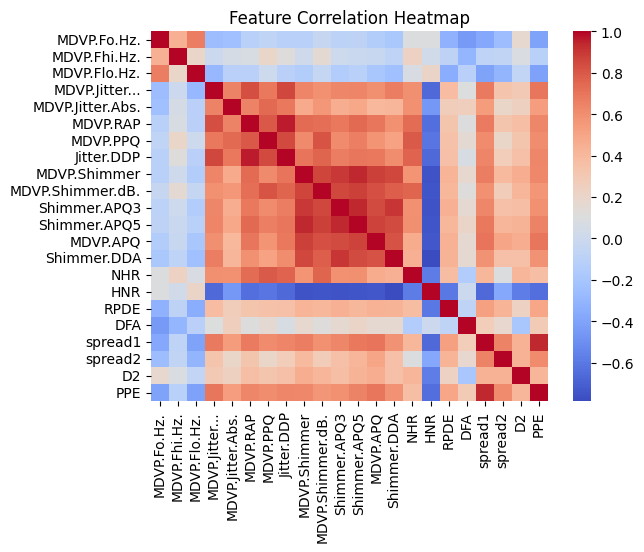

<Figure size 3000x4000 with 0 Axes>

In [22]:
sns.heatmap(parkinsons_syngen.drop("status", axis=1).corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.figure(figsize=(30,40))
plt.show()


# Train/Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_synpark, y_synpark, test_size=0.3, random_state=42, stratify=y_synpark )
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 136
Test samples: 59


# Logistic Regression
Logistic regression is a classification model that uses input variables to predict a categorical outcome variable that can take on one of a limited set of class values. A binomial logistic regression is limited to two binary output categories while a multinomial logistic regression allows for more than two classes. Examples of logistic regression include classifying a binary condition as “healthy” / “not healthy”, or an image as “bicycle” / “train” / “car” / “truck”. Logistic regression applies the logistic sigmoid function to weighted input values to generate a prediction of the data class.

Accuracy (Logistic Regression): 0.8135593220338984

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.69      0.67        16
           1       0.88      0.86      0.87        43

    accuracy                           0.81        59
   macro avg       0.76      0.77      0.77        59
weighted avg       0.82      0.81      0.82        59



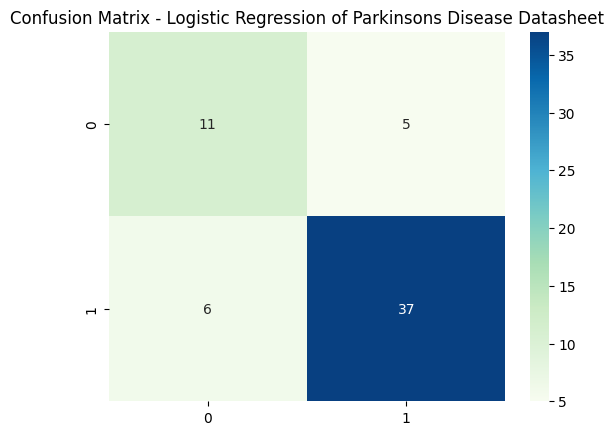

In [24]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='GnBu')
plt.title("Confusion Matrix - Logistic Regression of Parkinsons Disease Datasheet")
plt.show()

# Random Forest
Random forest is a popular ensemble learning method for classification. Ensemble learning methods combine multiple machine learning (ML) algorithms to obtain a better model—the wisdom of crowds applied to data science. They’re based on the concept that a group of people with limited knowledge about a problem domain can collectively arrive at a better solution than a single person with greater knowledge.

Random forest is an ensemble of decision trees, a problem-solving metaphor that’s familiar to nearly everyone. Decision trees arrive at an answer by asking a series of true/false questions about elements in a data set. In the example below, to predict a person's income, a decision looks at variables (features) such as whether the person has a job (yes or no) and whether the person owns a house. In an algorithmic context, the machine continually searches for which feature allows the observations in a set to be split in such a way that the resulting groups are as different from each other as possible and the members of each distinct subgroup are as similar to each other as possible.

Each tree in a random forest randomly samples subsets of the training data in a process known as bootstrap aggregating (bagging). The model is fit to these smaller data sets and the predictions are aggregated. Several instances of the same data can be used repeatedly through replacement sampling, and the result is that trees that are not only trained on different sets of data, but also different features used to make decisions.

Accuracy (Random Forest): 0.9322033898305084

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.98      0.93      0.95        43

    accuracy                           0.93        59
   macro avg       0.90      0.93      0.92        59
weighted avg       0.94      0.93      0.93        59



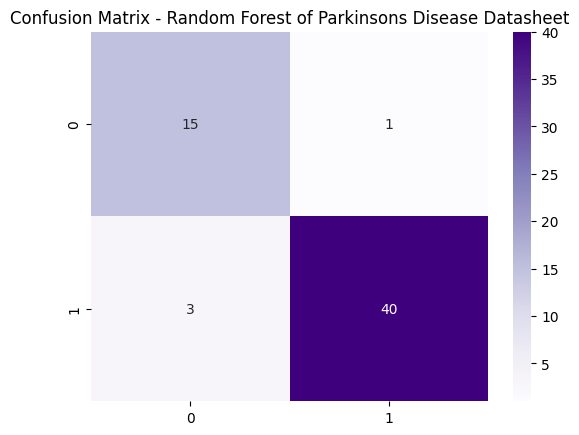

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Random Forest of Parkinsons Disease Datasheet")
plt.show()